# Predictive Maintainence using Pandas

### AIM: Developing a model which is capable of prediciting whether a particular machine will fail on a particular date based on its input features such as voltage, rotation, pressure, vibration etc, for that particular time.This is will help in proper management of resources and time in order to increase the overall throughput, as well as attend any issues, if necessary.

##### We have been given 3 datasets namely, "PdM_telemetry.csv" , "PdM_machines.csv", "PdM_failures". Each of them contains their respective attributes against all the readings. 

##### Introduction to pandas: Importing and working with 'telemetry' dataset


In [1]:
import pandas as pd
data = pd.read_csv('PdM_telemetry.csv')

In [2]:
data.describe()

,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


In [3]:
data.columns

Index(['datetime', 'machineID', 'volt', 'rotate', 'pressure', 'vibration'], dtype='object')

In [4]:
data['datetime'].head(10)

0    2015-01-01 06:00:00
1    2015-01-01 07:00:00
2    2015-01-01 08:00:00
3    2015-01-01 09:00:00
4    2015-01-01 10:00:00
5    2015-01-01 11:00:00
6    2015-01-01 12:00:00
7    2015-01-01 13:00:00
8    2015-01-01 14:00:00
9    2015-01-01 15:00:00
Name: datetime, dtype: object

In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#### To check if any values for any rows(tuples) is missing.

In [6]:
data.isna()

,datetime,machineID,volt,rotate,pressure,vibration
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
876095,False,False,False,False,False,False
876096,False,False,False,False,False,False
876097,False,False,False,False,False,False
876098,False,False,False,False,False,False


In [7]:
data.isna().sum()

datetime     0
machineID    0
volt         0
rotate       0
pressure     0
vibration    0
dtype: int64

In [8]:
data['datetime'].min()

'2015-01-01 06:00:00'

In [9]:
data['datetime'].max()

'2016-01-01 06:00:00'

This data is recorded over a year from 1/1/2015 - 1/1/2016.

In [10]:
data.head(10)

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511
5,2015-01-01 11:00:00,1,172.504839,430.323362,95.927042,35.655017
6,2015-01-01 12:00:00,1,156.556031,499.071623,111.755684,42.753920
7,2015-01-01 13:00:00,1,172.522781,409.624717,101.001083,35.482009
8,2015-01-01 14:00:00,1,175.324524,398.648781,110.624361,45.482287
9,2015-01-01 15:00:00,1,169.218423,460.850670,104.848230,39.901735


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 6 columns):
datetime     876100 non-null object
machineID    876100 non-null int64
volt         876100 non-null float64
rotate       876100 non-null float64
pressure     876100 non-null float64
vibration    876100 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 40.1+ MB


#### Attribute 'datetime' is of object type. Pandas supports datetime type. 

In [12]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [13]:
data.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


#### Some visualization for understanding

In [14]:
plot_df = data.loc[ data['machineID']==1 & (data['datetime'] > pd.to_datetime('2015-01-01')) 
                   & (data['datetime'] < pd.to_datetime('2015-02-01')),
                  ['datetime','volt']]

In [15]:
plot_df.shape

(738, 2)

/home/nisarg/ml/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


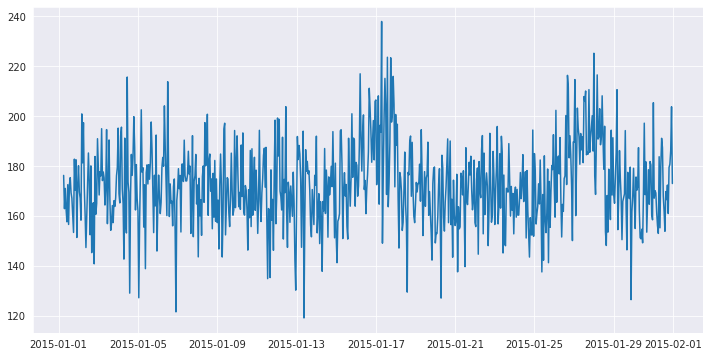

In [16]:
plot_df = data.loc[(data['machineID'] == 1) &
                        (data['datetime'] > pd.to_datetime('2015-01-01')) &
                        (data['datetime'] < pd.to_datetime('2015-02-01')), ['datetime', 'volt']]
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['volt'])


### Importing Machines dataset.

In [17]:
machines= pd.read_csv('PdM_machines.csv')

In [18]:
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


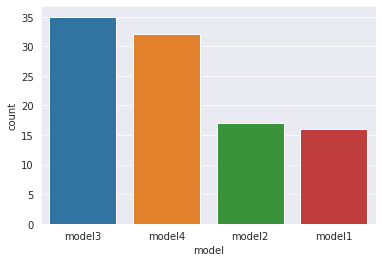

In [19]:
sns.countplot(x='model',data=machines)

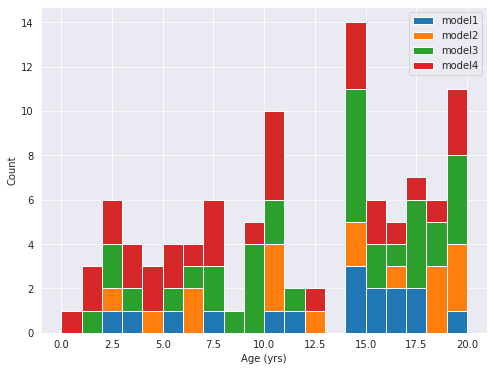

In [20]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
_, bins, _ = plt.hist([machines.loc[machines['model'] == 'model1', 'age'],
                       machines.loc[machines['model'] == 'model2', 'age'],
                       machines.loc[machines['model'] == 'model3', 'age'],
                       machines.loc[machines['model'] == 'model4', 'age']],
                       20, stacked=True, label=['model1', 'model2', 'model3', 'model4'])
plt.xlabel('Age (yrs)')
plt.ylabel('Count')
plt.legend()

### Importing failures dataset

In [21]:
failures = pd.read_csv('PdM_failures.csv')

In [22]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


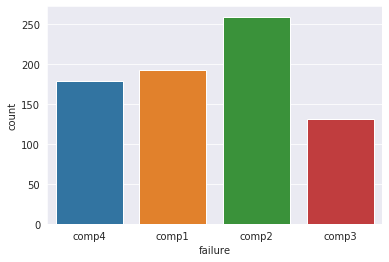

In [23]:
sns.countplot(x=failures['failure'])

In [24]:
data.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [25]:
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(data,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right', how='mean').unstack())
telemetry_mean_3h = pd.concat(temp, axis=1)
telemetry_mean_3h.columns = [i + 'mean_3h' for i in fields]
telemetry_mean_3h.reset_index(inplace=True)

# repeat for standard deviation
temp = []
for col in fields:
    temp.append(pd.pivot_table(data,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right', how='std').unstack())
telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + 'sd_3h' for i in fields]
telemetry_sd_3h.reset_index(inplace=True)

telemetry_mean_3h.head()

/home/nisarg/ml/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  import sys
/home/nisarg/ml/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).std()


,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542


In [26]:
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append((pd.pivot_table(data,
                                               index='datetime',
                                               columns='machineID',
                                               values=col)).resample('3H',
                                                                                closed='left',
                                                                                label='right',
                                                                                how='first').rolling(window=24).mean().unstack())
telemetry_mean_24h = pd.concat(temp, axis=1)
telemetry_mean_24h.columns = [i + 'mean_24h' for i in fields]
telemetry_mean_24h.reset_index(inplace=True)
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h['voltmean_24h'].isnull()]

# repeat for standard deviation
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append((pd.pivot_table(data,
                                               index='datetime',
                                               columns='machineID',
                                               values=col)).resample('3H',
                                                                                closed='left',
                                                                                label='right',
                                                                                how='first').rolling(window=24).mean().unstack())
telemetry_sd_24h = pd.concat(temp, axis=1)
telemetry_sd_24h.columns = [i + 'sd_24h' for i in fields]
telemetry_sd_24h.reset_index(inplace=True)
telemetry_sd_24h = telemetry_sd_24h.loc[-telemetry_sd_24h['voltsd_24h'].isnull()]

# Notice that a 24h rolling average is not available at the earliest timepoints
telemetry_mean_24h.head(10)



/home/nisarg/ml/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
  # Remove the CWD from sys.path while we load stuff.
/home/nisarg/ml/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()


,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h
23,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022
24,1,2015-01-04 09:00:00,171.069056,457.285237,101.011726,44.148324
25,1,2015-01-04 12:00:00,170.859615,461.116153,101.172241,44.672216
26,1,2015-01-04 15:00:00,171.566669,457.893518,100.708151,44.993232
27,1,2015-01-04 18:00:00,171.536866,457.672110,99.826551,45.160570
28,1,2015-01-04 21:00:00,172.800672,454.497453,100.896227,45.690929
29,1,2015-01-05 00:00:00,171.963248,452.687991,101.312313,45.658369
30,1,2015-01-05 03:00:00,171.206225,448.104961,101.030466,46.457982
31,1,2015-01-05 06:00:00,171.999801,449.729553,101.472850,46.879346
32,1,2015-01-05 09:00:00,171.247302,451.930970,101.368307,47.831655


In [27]:
telemetry_mean_24h.columns

Index(['machineID', 'datetime', 'voltmean_24h', 'rotatemean_24h',
       'pressuremean_24h', 'vibrationmean_24h'],
      dtype='object')

In [28]:
telemetry_mean_24h.shape

(289800, 6)

In [29]:
data.shape

(876100, 6)

In [30]:
telemetry_mean_24h.head()

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h
23,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022
24,1,2015-01-04 09:00:00,171.069056,457.285237,101.011726,44.148324
25,1,2015-01-04 12:00:00,170.859615,461.116153,101.172241,44.672216
26,1,2015-01-04 15:00:00,171.566669,457.893518,100.708151,44.993232
27,1,2015-01-04 18:00:00,171.536866,457.672110,99.826551,45.160570


### Moving towards the final dataset creation

In [31]:
final = telemetry_mean_24h.merge(machines,how='inner',left_on=['machineID'], right_on=['machineID'])

In [32]:
final.head(10)

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,model,age
0,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022,model3,18
1,1,2015-01-04 09:00:00,171.069056,457.285237,101.011726,44.148324,model3,18
2,1,2015-01-04 12:00:00,170.859615,461.116153,101.172241,44.672216,model3,18
3,1,2015-01-04 15:00:00,171.566669,457.893518,100.708151,44.993232,model3,18
4,1,2015-01-04 18:00:00,171.536866,457.672110,99.826551,45.160570,model3,18
5,1,2015-01-04 21:00:00,172.800672,454.497453,100.896227,45.690929,model3,18
6,1,2015-01-05 00:00:00,171.963248,452.687991,101.312313,45.658369,model3,18
7,1,2015-01-05 03:00:00,171.206225,448.104961,101.030466,46.457982,model3,18
8,1,2015-01-05 06:00:00,171.999801,449.729553,101.472850,46.879346,model3,18
9,1,2015-01-05 09:00:00,171.247302,451.930970,101.368307,47.831655,model3,18


In [33]:
final.describe()

,machineID,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,age
count,289800.00000,289800.000000,289800.000000,289800.000000,289800.000000,289800.000000
mean,50.50000,170.727227,446.640547,100.866006,40.380446,11.330000
std,28.86612,4.166841,15.659845,3.968049,1.761692,5.827625
min,1.00000,156.713608,310.118604,91.162625,35.800869,0.000000
25%,25.75000,168.097257,440.861651,98.730726,39.377596,6.750000
50%,50.50000,170.279341,448.776742,100.195579,40.105955,12.000000
75%,75.25000,172.599180,456.140796,101.777636,40.907991,16.000000
max,100.00000,206.333895,491.081522,138.291979,55.266429,20.000000


In [34]:
data.shape[0]/final.shape[0]

3.02311939268461

In [35]:
data.shape

(876100, 6)

In [36]:
final.columns

Index(['machineID', 'datetime', 'voltmean_24h', 'rotatemean_24h',
       'pressuremean_24h', 'vibrationmean_24h', 'model', 'age'],
      dtype='object')

In [37]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


   ### Here, we just care about whether a machine fails or not. So, for all dates present in 'failures'.We represent the failure attribute as 1 , else 0.

In [38]:
failures['failure'] =1

In [39]:
failures.head(10)

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,1
1,2015-03-06 06:00:00,1,1
2,2015-04-20 06:00:00,1,1
3,2015-06-19 06:00:00,1,1
4,2015-09-02 06:00:00,1,1
5,2015-10-17 06:00:00,1,1
6,2015-12-16 06:00:00,1,1
7,2015-03-19 06:00:00,2,1
8,2015-03-19 06:00:00,2,1
9,2015-04-18 06:00:00,2,1


In [40]:
final['datetime'].dtype

dtype('<M8[ns]')

In [41]:
final['datetime']

0        2015-01-04 06:00:00
1        2015-01-04 09:00:00
2        2015-01-04 12:00:00
3        2015-01-04 15:00:00
4        2015-01-04 18:00:00
                 ...        
289795   2015-12-31 21:00:00
289796   2016-01-01 00:00:00
289797   2016-01-01 03:00:00
289798   2016-01-01 06:00:00
289799   2016-01-01 09:00:00
Name: datetime, Length: 289800, dtype: datetime64[ns]

In [42]:
failures['datetime'].dtype

dtype('O')

In [43]:
failures['datetime'] = pd.to_datetime( failures['datetime'] )

In [44]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289800 entries, 0 to 289799
Data columns (total 8 columns):
machineID            289800 non-null int64
datetime             289800 non-null datetime64[ns]
voltmean_24h         289800 non-null float64
rotatemean_24h       289800 non-null float64
pressuremean_24h     289800 non-null float64
vibrationmean_24h    289800 non-null float64
model                289800 non-null object
age                  289800 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 19.9+ MB


### Creating a new date attribute for failures by extracting just the date from the type(datetime).

In [45]:
failures['date'] = failures['datetime'].dt.date

In [46]:
failures.head(10)

,datetime,machineID,failure,date
0,2015-01-05 06:00:00,1,1,2015-01-05
1,2015-03-06 06:00:00,1,1,2015-03-06
2,2015-04-20 06:00:00,1,1,2015-04-20
3,2015-06-19 06:00:00,1,1,2015-06-19
4,2015-09-02 06:00:00,1,1,2015-09-02
5,2015-10-17 06:00:00,1,1,2015-10-17
6,2015-12-16 06:00:00,1,1,2015-12-16
7,2015-03-19 06:00:00,2,1,2015-03-19
8,2015-03-19 06:00:00,2,1,2015-03-19
9,2015-04-18 06:00:00,2,1,2015-04-18


### Similarly, creating a new date attribute for final.

In [47]:
final['date'] = final['datetime'].dt.date

In [48]:
final.head(10)

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,model,age,date
0,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022,model3,18,2015-01-04
1,1,2015-01-04 09:00:00,171.069056,457.285237,101.011726,44.148324,model3,18,2015-01-04
2,1,2015-01-04 12:00:00,170.859615,461.116153,101.172241,44.672216,model3,18,2015-01-04
3,1,2015-01-04 15:00:00,171.566669,457.893518,100.708151,44.993232,model3,18,2015-01-04
4,1,2015-01-04 18:00:00,171.536866,457.672110,99.826551,45.160570,model3,18,2015-01-04
5,1,2015-01-04 21:00:00,172.800672,454.497453,100.896227,45.690929,model3,18,2015-01-04
6,1,2015-01-05 00:00:00,171.963248,452.687991,101.312313,45.658369,model3,18,2015-01-05
7,1,2015-01-05 03:00:00,171.206225,448.104961,101.030466,46.457982,model3,18,2015-01-05
8,1,2015-01-05 06:00:00,171.999801,449.729553,101.472850,46.879346,model3,18,2015-01-05
9,1,2015-01-05 09:00:00,171.247302,451.930970,101.368307,47.831655,model3,18,2015-01-05


### Performing left-outer join from (final, failures) using attributes 'machineID','date'.

In [49]:
final2 = final.merge(failures, how='left',left_on=['machineID','date'],right_on=['machineID','date'])

In [50]:
final2.head(10)

,machineID,datetime_x,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,model,age,date,datetime_y,failure
0,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022,model3,18,2015-01-04,NaT,NaN
1,1,2015-01-04 09:00:00,171.069056,457.285237,101.011726,44.148324,model3,18,2015-01-04,NaT,NaN
2,1,2015-01-04 12:00:00,170.859615,461.116153,101.172241,44.672216,model3,18,2015-01-04,NaT,NaN
3,1,2015-01-04 15:00:00,171.566669,457.893518,100.708151,44.993232,model3,18,2015-01-04,NaT,NaN
4,1,2015-01-04 18:00:00,171.536866,457.672110,99.826551,45.160570,model3,18,2015-01-04,NaT,NaN
5,1,2015-01-04 21:00:00,172.800672,454.497453,100.896227,45.690929,model3,18,2015-01-04,NaT,NaN
6,1,2015-01-05 00:00:00,171.963248,452.687991,101.312313,45.658369,model3,18,2015-01-05,2015-01-05 06:00:00,1.0
7,1,2015-01-05 03:00:00,171.206225,448.104961,101.030466,46.457982,model3,18,2015-01-05,2015-01-05 06:00:00,1.0
8,1,2015-01-05 06:00:00,171.999801,449.729553,101.472850,46.879346,model3,18,2015-01-05,2015-01-05 06:00:00,1.0
9,1,2015-01-05 09:00:00,171.247302,451.930970,101.368307,47.831655,model3,18,2015-01-05,2015-01-05 06:00:00,1.0


### Removing redundant attributes such as datetime_y from failures

In [51]:
final2.drop('datetime_y',axis=1,inplace=True)

In [52]:
final2.head(10)

,machineID,datetime_x,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,model,age,date,failure
0,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022,model3,18,2015-01-04,NaN
1,1,2015-01-04 09:00:00,171.069056,457.285237,101.011726,44.148324,model3,18,2015-01-04,NaN
2,1,2015-01-04 12:00:00,170.859615,461.116153,101.172241,44.672216,model3,18,2015-01-04,NaN
3,1,2015-01-04 15:00:00,171.566669,457.893518,100.708151,44.993232,model3,18,2015-01-04,NaN
4,1,2015-01-04 18:00:00,171.536866,457.672110,99.826551,45.160570,model3,18,2015-01-04,NaN
5,1,2015-01-04 21:00:00,172.800672,454.497453,100.896227,45.690929,model3,18,2015-01-04,NaN
6,1,2015-01-05 00:00:00,171.963248,452.687991,101.312313,45.658369,model3,18,2015-01-05,1.0
7,1,2015-01-05 03:00:00,171.206225,448.104961,101.030466,46.457982,model3,18,2015-01-05,1.0
8,1,2015-01-05 06:00:00,171.999801,449.729553,101.472850,46.879346,model3,18,2015-01-05,1.0
9,1,2015-01-05 09:00:00,171.247302,451.930970,101.368307,47.831655,model3,18,2015-01-05,1.0


In [53]:
final2['model'] = final2['model'].astype('category')

In [54]:
final2['model'].dtype

CategoricalDtype(categories=['model1', 'model2', 'model3', 'model4'], ordered=False)

### Converting category type to numeric type, so as to feed it to a Machine Learning algorithm.

In [55]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_enc = OrdinalEncoder()
final2_model = ordinal_enc.fit_transform( final2[['model']] )

In [56]:
transformed = pd.DataFrame(final2_model)

In [57]:
transformed.tail(10)

,0
290118,3.0
290119,3.0
290120,3.0
290121,3.0
290122,3.0
290123,3.0
290124,3.0
290125,3.0
290126,3.0
290127,3.0


In [58]:
final3 = pd.concat([final2, transformed], axis=1).drop(['model'],axis=1)

In [59]:
final3.rename( columns={0:'model_enc'} , inplace=True) 

In [60]:
final3.head(10)

,machineID,datetime_x,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,age,date,failure,model_enc
0,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022,18,2015-01-04,NaN,2.0
1,1,2015-01-04 09:00:00,171.069056,457.285237,101.011726,44.148324,18,2015-01-04,NaN,2.0
2,1,2015-01-04 12:00:00,170.859615,461.116153,101.172241,44.672216,18,2015-01-04,NaN,2.0
3,1,2015-01-04 15:00:00,171.566669,457.893518,100.708151,44.993232,18,2015-01-04,NaN,2.0
4,1,2015-01-04 18:00:00,171.536866,457.672110,99.826551,45.160570,18,2015-01-04,NaN,2.0
5,1,2015-01-04 21:00:00,172.800672,454.497453,100.896227,45.690929,18,2015-01-04,NaN,2.0
6,1,2015-01-05 00:00:00,171.963248,452.687991,101.312313,45.658369,18,2015-01-05,1.0,2.0
7,1,2015-01-05 03:00:00,171.206225,448.104961,101.030466,46.457982,18,2015-01-05,1.0,2.0
8,1,2015-01-05 06:00:00,171.999801,449.729553,101.472850,46.879346,18,2015-01-05,1.0,2.0
9,1,2015-01-05 09:00:00,171.247302,451.930970,101.368307,47.831655,18,2015-01-05,1.0,2.0


### Converting NaN values of failure attribute to 0.

In [61]:
final3.loc[ final3['failure']!=1, ['failure']]=0
final3.head(10)

,machineID,datetime_x,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,age,date,failure,model_enc
0,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022,18,2015-01-04,0.0,2.0
1,1,2015-01-04 09:00:00,171.069056,457.285237,101.011726,44.148324,18,2015-01-04,0.0,2.0
2,1,2015-01-04 12:00:00,170.859615,461.116153,101.172241,44.672216,18,2015-01-04,0.0,2.0
3,1,2015-01-04 15:00:00,171.566669,457.893518,100.708151,44.993232,18,2015-01-04,0.0,2.0
4,1,2015-01-04 18:00:00,171.536866,457.672110,99.826551,45.160570,18,2015-01-04,0.0,2.0
5,1,2015-01-04 21:00:00,172.800672,454.497453,100.896227,45.690929,18,2015-01-04,0.0,2.0
6,1,2015-01-05 00:00:00,171.963248,452.687991,101.312313,45.658369,18,2015-01-05,1.0,2.0
7,1,2015-01-05 03:00:00,171.206225,448.104961,101.030466,46.457982,18,2015-01-05,1.0,2.0
8,1,2015-01-05 06:00:00,171.999801,449.729553,101.472850,46.879346,18,2015-01-05,1.0,2.0
9,1,2015-01-05 09:00:00,171.247302,451.930970,101.368307,47.831655,18,2015-01-05,1.0,2.0


In [62]:
final3['model_enc'].value_counts()

2.0    101502
3.0     92824
1.0     49330
0.0     46472
Name: model_enc, dtype: int64

In [63]:
ordinal_enc.categories_

[array(['model1', 'model2', 'model3', 'model4'], dtype=object)]

In [64]:
final3.sort_values(by=['datetime_x'], inplace=True)

In [65]:
final3.to_csv('final_dataset2.csv',index=False)

In [66]:
final31 = pd.read_csv('final_dataset2.csv')

In [67]:
final31.head()

,machineID,datetime_x,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,age,date,failure,model_enc
0,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022,18,2015-01-04,0.0,2.0
1,29,2015-01-04 06:00:00,166.613863,453.121906,101.166076,40.561007,3,2015-01-04,0.0,3.0
2,30,2015-01-04 06:00:00,175.672229,446.957238,98.466369,39.988195,20,2015-01-04,0.0,2.0
3,31,2015-01-04 06:00:00,168.979748,455.771697,97.419663,41.387643,11,2015-01-04,0.0,0.0
4,32,2015-01-04 06:00:00,171.493287,407.726484,106.015786,38.649454,15,2015-01-04,0.0,3.0
